In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from googlefinance.client import get_price_data
import seaborn as sns
import numpy as np
%matplotlib inline

<h1> Rolling Windows</h1><br>

In [3]:
#Reading market data for General Electric
param_GE = {'q': "GE",'x': "NYSE","p" : "5Y",'i': "86400"}
df = get_price_data(param_GE)
df.head()

,Open,High,Low,Close,Volume
2013-04-23 22:00:00,21.55,21.69,21.36,21.50,65822433
2013-04-24 22:00:00,21.69,22.03,21.65,21.96,51506646
2013-04-25 22:00:00,22.21,22.23,21.91,21.95,41469691
2013-04-26 22:00:00,21.98,22.40,21.97,22.21,47032947
2013-04-29 22:00:00,22.31,22.32,22.00,22.27,36536118


Create Rolling window of 50 days to calculate the difference between the highest and lowest closing price

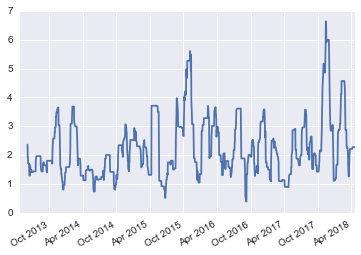

In [4]:
df['disp']=df['Close'].rolling(window=30).apply(lambda x: np.max(x)-np.min(x))
df['disp'].plot();

Calculate 5 Day Rolling Volatlity

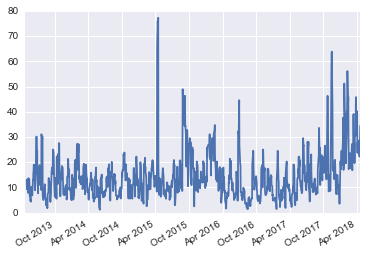

In [5]:
df['Ret'] = df['Close'].pct_change(periods=1)
df['Vol']= df['Ret'].rolling(window=5).apply(lambda x : np.std(x)*np.sqrt(250)*100)
df['Vol'].plot();
